## Data Analysis

# Dataset

Il dataset scelto è disponibile su Kaggle <a href="https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset">a questo link</a>.
Questo è composto da due colonne clean_comment e category.<br>
La colonna <i>clean_comment</i> contiene i post e i commenti estratti da vari SubReddits principalmente su Modi (Candito al ruolo di primo ministro indiano nel 2019) e altri canditati al ruolo di primo ministro.
La colonna <i>category</i>, invece, contiene dei valori numerici:
<ul>
    <li>-1, che indica un commento Negativo</li>
    <li>0, che indica un commento Neutrale</li>
    <li>1, che indica un commento Positivo</li>
</ul>

Il dataset ha circa 37 mila commenti, ogniuno associato alla label che indica il sentimento <br>

# Analisi

In [21]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dataset = pd.read_csv("./Reddit_data.csv")
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


In [22]:
print(f"Il dataset contiene {dataset.shape[0]} righe e {dataset.shape[1]} colonne.")
print(f"Numero di post etichettati negativi: {len(dataset.query('category == -1'))}")
print(f"Numero di post etichettati neutri: {len(dataset.query('category == 0'))}")
print(f"Numero di post etichettati positivi: {len(dataset.query('category == 1'))}")

Il dataset contiene 37149 righe e 2 colonne.
Numero di post etichettati negativi: 8277
Numero di post etichettati neutri: 13042
Numero di post etichettati positivi: 15830


Informazioni sui post etichettati negativi:
Numero medio di parole: 34.79
Lunghezza media in caratteri: 214.80
Le 20 parole più comuni nei post etichettati negativi, con la relativa frequenza, sono [('the', 14538), ('and', 7737), ('that', 4124), ('this', 3829), ('for', 3312), ('you', 3048), ('are', 2981), ('they', 2551), ('not', 2525), ('have', 2202), ('but', 2065), ('with', 2007), ('was', 1697), ('will', 1667), ('people', 1560), ('all', 1543), ('bjp', 1524), ('what', 1414), ('from', 1375), ('like', 1343)].


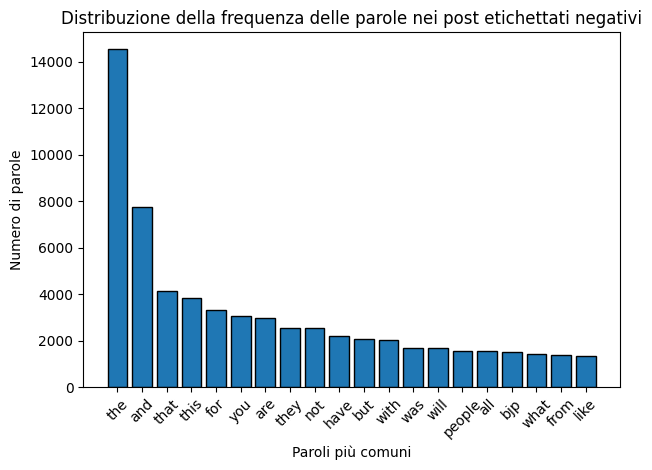

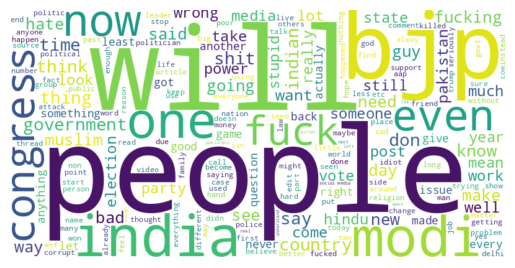

In [25]:
print("Informazioni sui post etichettati negativi:")
negative_posts = dataset.query('category == -1').copy()

negative_posts['word_count'] = negative_posts['clean_comment'].str.split().apply(len)
mean_word_count = negative_posts['word_count'].mean()
print(f"Numero medio di parole: {mean_word_count:.2f}")

avg_length_chars = negative_posts['clean_comment'].str.len().mean()
print(f"Lunghezza media in caratteri: {avg_length_chars:.2f}")

all_words = ' '.join(negative_posts['clean_comment']).lower().split()
common_words = Counter(all_words).most_common(20)
print(f"Le 20 parole più comuni nei post etichettati negativi, con la relativa frequenza, sono {common_words}.")

x_values = [word for word, _ in common_words]
y_values = [freq for _, freq in common_words]

plt.bar(x_values, y_values,  edgecolor='black')
plt.xlabel('Paroli più comuni')
plt.ylabel('Numero di parole')
plt.title('Distribuzione della frequenza delle parole nei post etichettati negativi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


text = ' '.join(negative_posts['clean_comment']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Informazioni sui post etichettati Neutri:
Numero medio di parole: 9.75
Lunghezza media in caratteri: 59.57
Le 20 parole più comuni nei post etichettati neutrali, con la relativa frequenza, sono [('the', 5730), ('and', 2016), ('this', 1624), ('you', 1571), ('for', 1350), ('that', 1297), ('are', 1091), ('same', 1031), ('not', 863), ('modi', 847), ('what', 843), ('they', 762), ('with', 753), ('will', 723), ('have', 713), ('bjp', 675), ('can', 650), ('like', 628), ('india', 594), ('was', 563)].


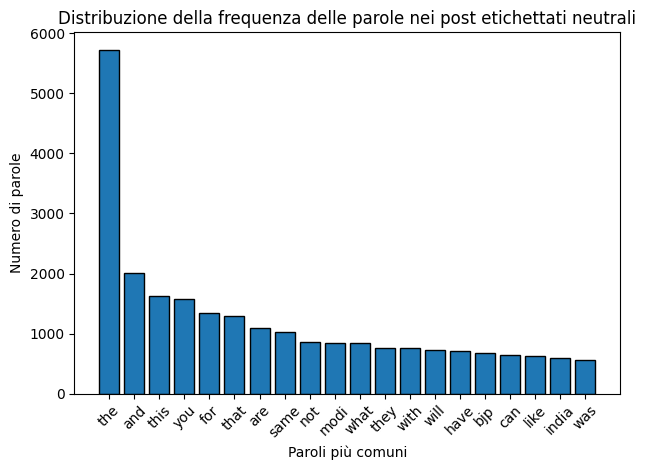

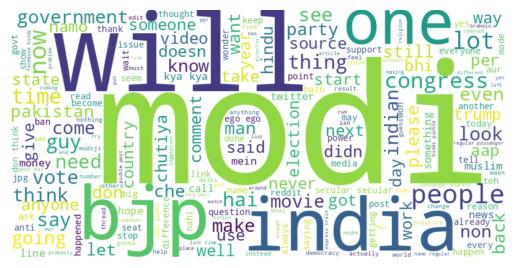

In [26]:
print("Informazioni sui post etichettati Neutri:")
neutral_posts = dataset.query('category == 0').copy()

neutral_posts['word_count'] = neutral_posts['clean_comment'].str.split().apply(len)
mean_word_count = neutral_posts['word_count'].mean()
print(f"Numero medio di parole: {mean_word_count:.2f}")

avg_length_chars = neutral_posts['clean_comment'].str.len().mean()
print(f"Lunghezza media in caratteri: {avg_length_chars:.2f}")

all_words = ' '.join(neutral_posts['clean_comment']).lower().split()
common_words = Counter(all_words).most_common(20)
print(f"Le 20 parole più comuni nei post etichettati neutrali, con la relativa frequenza, sono {common_words}.")

x_values = [word for word, _ in common_words]
y_values = [freq for _, freq in common_words]

plt.bar(x_values, y_values,  edgecolor='black')
plt.xlabel('Paroli più comuni')
plt.ylabel('Numero di parole')
plt.title('Distribuzione della frequenza delle parole nei post etichettati neutrali')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


text = ' '.join(neutral_posts['clean_comment']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Informazioni sui post etichettati Positivi:
Numero medio di parole: 42.78
Lunghezza media in caratteri: 264.28
Le 20 parole più comuni nei post etichettati positivi, con la relativa frequenza, sono [('the', 37445), ('and', 19205), ('that', 9960), ('for', 8325), ('this', 8035), ('you', 7117), ('are', 6496), ('have', 5470), ('they', 5345), ('not', 5312), ('with', 5088), ('but', 4732), ('will', 4517), ('was', 4118), ('people', 3585), ('has', 3358), ('india', 3252), ('can', 3096), ('all', 3084), ('like', 3075)].


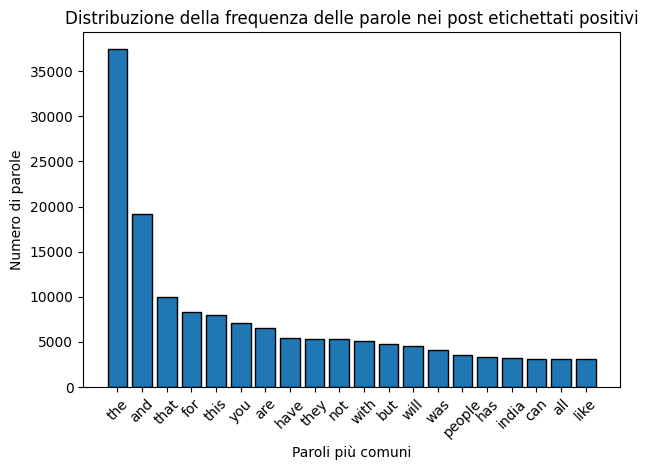

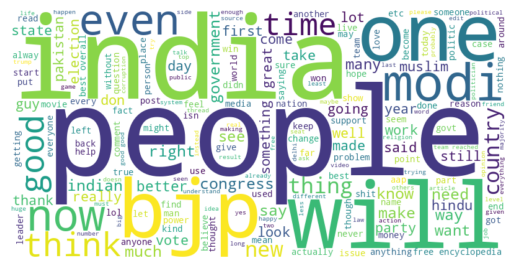

In [27]:
print("Informazioni sui post etichettati Positivi:")
positive_posts = dataset.query('category == 1').copy()

positive_posts['word_count'] = positive_posts['clean_comment'].str.split().apply(len)
mean_word_count = positive_posts['word_count'].mean()
print(f"Numero medio di parole: {mean_word_count:.2f}")

avg_length_chars = positive_posts['clean_comment'].str.len().mean()
print(f"Lunghezza media in caratteri: {avg_length_chars:.2f}")

all_words = ' '.join(positive_posts['clean_comment']).lower().split()
common_words = Counter(all_words).most_common(20)
print(f"Le 20 parole più comuni nei post etichettati positivi, con la relativa frequenza, sono {common_words}.")

x_values = [word for word, _ in common_words]
y_values = [freq for _, freq in common_words]

plt.bar(x_values, y_values,  edgecolor='black')
plt.xlabel('Paroli più comuni')
plt.ylabel('Numero di parole')
plt.title('Distribuzione della frequenza delle parole nei post etichettati positivi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


text = ' '.join(positive_posts['clean_comment']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Confronto

Andiamo a fare un confronto tra le analisi dei tre possibili label:

<table>
    <tr>
        <td>Valore del confronto</td>
        <td>Commenti Positivi</td>
        <td>Commenti Neutrali</td>
        <td>Commenti Positivi</td>
    </tr>
    <tr>
        <td>Numero Medio di parole</td>
        <td>42.78</td>
        <td>9.75</td>
        <td>34.79</td>
    </tr>
    <tr>
        <td>Numero medio di caratteri</td>
        <td>264.28</td>
        <td>59.57</td>
        <td>214.80</td>
    </tr>
</table>

Possiamo notare come <i>i commenti neutrali risultano mediamente più corti</i>.

<div style="display: flex; justify-content: space-around;">
    <img src="img/parole_positive.png" style="width: 30%;"/>
    <img src="img/parole_neutrali.png" style="width: 30%;"/>
    <img src="img/parole_negative.png" style="width: 30%;"/>
</div>

Com'è classico in questi casi, la distribuzione delle parole non ci dà significativi informazioni. Le parole più usate sono in comune a tutte le categorie e sono perlopiù articoli e congiunzioni.


<div style="display: flex; justify-content: space-around;">
    <div>
        <img src="img/word_cloud_positive.png" style="width: 80%;"/>
        <p>Word Cloud Positive</p>
    </div>
    <div>
        <img src="img/word_cloud_neutrali.png" style="width: 80%;"/>
        <p>Word Cloud Neutrali</p>
    </div>
    <div>
        <img src="img/word_cloud_negative.png" style="width: 80%;"/>
        <p>Word Cloud Negative</p>
    </div>
</div>

Nuovamente, notiamo come i word cloud <i>non ci danno ulteriori informazioni</i>.
Le parole più comuni, anche dopo la rimozione delle così dette Stop word (articoli, congiunzioni, ecc), sono in comune a tutte e tre le categorie. In particolare abbiamo Modi, BJP (Bharatiya Janata Party, partito del polo indiano), india, people, ecc. <br>
Notiamo però, che vi è qualche differenza tra le parole meno frequenti. In particolare nella label negativa sono frequenti insulti, che non riporterò, mentre nella label positive sono presenti complimenti e parole come "better", "good", "great" e simili